<a href="https://colab.research.google.com/github/specialak/Digit_Recognizer/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:

!pip install -U -q pydrive

    100% |████████████████████████████████| 993kB 18.1MB/s 


In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials  = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
train_data = '1Ma_kBqf8xwHywDSKG6bTVgPlYZrOB40l'
test_data = '1x_VMcqHXpmhYm0z268wez3w2ZFm---V9'

In [0]:
train = drive.CreateFile({'id': train_data})
train.GetContentFile('train.csv')
test = drive.CreateFile({'id' : test_data})
test.GetContentFile('test.csv')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.shape

(42000, 785)

In [0]:
test.shape


(28000, 784)

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train.isnull().sum().sort_values(ascending = False)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
pixel257    0
pixel256    0
pixel255    0
pixel254    0
pixel253    0
pixel252    0
pixel251    0
pixel250    0
pixel249    0
pixel248    0
pixel247    0
pixel246    0
pixel245    0
pixel266    0
pixel268    0
pixel390    0
pixel269    0
pixel290    0
pixel289    0
pixel288    0
           ..
pixel495    0
pixel494    0
pixel493    0
pixel492    0
pixel491    0
pixel512    0
pixel513    0
pixel514    0
pixel526    0
pixel535    0
pixel534    0
pixel533    0
pixel532    0
pixel531    0
pixel530    0
pixel529    0
pixel528    0
pixel527    0
pixel525    0
pixel515    0
pixel524    0
pixel523    0
pixel522    0
pixel521    0
pixel520    0
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64

In [0]:
X_train = train.iloc[:,1:].values
Y_train = train.iloc[:,0].values


In [0]:
print(X_train.shape)
Y_train.shape

(42000, 784)


(42000,)

In [0]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

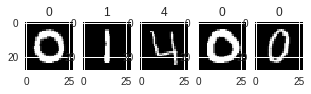

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28)
for i in range(1,6):
  plt.subplot(360+(i+1))
  plt.imshow(X_train[i],cmap = plt.get_cmap('gray'))
  plt.title(Y_train[i])

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = test.values
X_test = X_test.reshape(test.shape[0],28,28,1)

In [0]:
X_train.shape

(42000, 28, 28, 1)

In [0]:
X_test.shape

(28000, 28, 28, 1)

In [0]:
def standardize(x):
  return (x-X_train.mean())/X_train.std()

In [12]:
#know the number of different output
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
Y_train.shape

(42000, 10)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


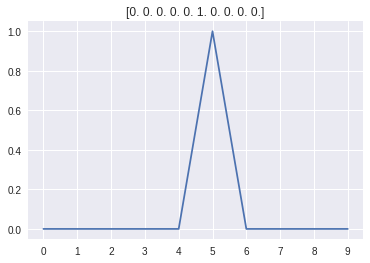

In [0]:
plt.title(Y_train[8])
plt.plot(Y_train[8])
plt.xticks(range(10));

# Designing neural network model


In [0]:
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [0]:

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

Instructions for updating:
Colocations handled automatically by placer.
input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [0]:
model.compile(optimizer = RMSprop(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [0]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [0]:
from sklearn.model_selection import train_test_split

X = X_train
Y = Y_train
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.10, random_state = 0)

batches = gen.flow(X_train, Y_train, batch_size = 64)
val_batches = gen.flow(X_val,Y_val, batch_size = 64)

In [0]:
history = model.fit_generator(generator = batches,steps_per_epoch = batches.n, epochs = 3, validation_data = val_batches,
                             validation_steps = val_batches.n)

In [0]:
def fc_model():
  model = Sequential([Lambda(standardize,input_shape = (28,28,1)),Flatten(),
                     Dense(512, activation  = 'relu'),
                     Dense(10, activation = 'softmax')])
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [0]:
fc = fc_model()
fc.optimizer.lr = 0.01

In [0]:
fc_history = model.fit_generator(generator = batches,steps_per_epoch = batches.n, epochs = 2, validation_data = val_batches,
                             validation_steps = val_batches.n)

#CNN

In [0]:
from keras.layers import Convolution2D, MaxPooling2D
def CNN():
  model = Sequential([Lambda(standardize, input_shape = (28,28,1)),
                     Convolution2D(32,(3,3),activation = 'relu'),
                     Convolution2D(32,(3,3),activation = 'relu'),
                     MaxPooling2D(),
                     Convolution2D(64,(3,3), activation='relu'),
                     Convolution2D(64,(3,3), activation='relu'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512,activation = 'relu'),
                     Dense(10,activation = 'softmax')])
  model.compile(optimizer =Adam() , loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [17]:
cnn = CNN()
cnn.optimizer.lr = 0.01

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cnn_history = cnn.fit_generator(generator = batches,steps_per_epoch = batches.n, epochs = 1    , validation_data = val_batches,
                             validation_steps = val_batches.n)

Epoch 1/1
36127/37800 [===========================>..] - ETA: 4:40 - loss: 0.0924 - acc: 0.9732

**DATA AUGMENTATION**

In [0]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, Y_train, batch_size=64)
val_batches = gen.flow(X_val, Y_val, batch_size=64)

In [0]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

**Adding Batch Normalization**

In [0]:
from keras.layers.normalization import BatchNormalization

def bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model= bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
37800/37800 [==============================] - 9152s 242ms/step - loss: 0.0356 - acc: 0.9898 - val_loss: 0.0310 - val_acc: 0.9933


In [25]:

gen = image.ImageDataGenerator()
batches = gen.flow(X, Y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1)

Epoch 1/1
42000/42000 [==============================] - 9282s 221ms/step - loss: 0.0107 - acc: 0.9981


In [0]:
pred = model.predict_classes(X_test, verbose=0)

submission=pd.DataFrame({"ImageId": list(range(1,len(pred)+1)),
                         "Label": pred})
submission.to_csv("output.csv", index=False, header=True)